# 课程项目：Kaggle-Titanic 泰坦尼克号获救问题

> by 马川 燕山大学

![](images/Titanic.jpg)

> 问题设置参考自网络，结合本课程进行了修改和扩充，以期为学生提供一个完整的项目案例。藉练手，贯所学，一窥数据分析之面貌。

>**代码胜于雄辩(Talk is cheap.Show me the code)** 

>               ---- 林纳斯·托瓦兹(Linus Torvalds)

> 参考链接：[**Kaggle-Titanic项目:**  https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

> 参考链接：https://blog.csdn.net/zongzi009/article/details/82391034

> 参考链接：https://github.com/massquantity/Kaggle-Titanic

> 参考链接：https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12282042.0.0.1dce2042NBc6J6&postId=6772 

本项目数据来源于[kaggle上的Titanic数据集](https://www.kaggle.com/c/titanic/data)，共计1309条数据，其中训练集891条，测试集418条。对泰坦尼克号乘客数据进行分析，**挖掘获救乘客和遇难乘客的数据特点以及与其他因素的相关性，寻找影响乘客生存与否的因素。**

**PS**:Kaggle项目还会要求根据训练集构建模型并对测试集中的数据进行预测，但本课程不涉及预测问题。

## 1. 问题及思路

### 提出问题

**1. 整体来看，存活比例如何？**

> 要求：
>    ① 将train.csv，test.csv和gender_submission.csv合并为titanic.csv
>    ② 查看已知存活数据中，存活比例如何？

**2. 结合性别和年龄数据，分析幸存下来的人是哪些人？**

> 要求：
>    ① 年龄数据的分布情况
>    ② 男性和女性存活情况
>    ③ 老人和小孩存活情况

**3. 结合 SibSp、Parch字段，研究亲人多少与存活的关系**

> 要求：
>    ① 有无兄弟姐妹/父母子女和存活与否的关系
>    ② 亲戚多少与存活与否的关系

**4. 结合票的费用情况，研究票价和存活与否的关系**

> 要求：
>    ① 票价分布和存活与否的关系
>    ② 比较研究生还者和未生还者的票价情况

**5. 称呼与存活与否的关系**

> 要求：
>    ① 观察不同称呼与生存率的关系


### 实现思路

1. 计算整体的存活率，深入分析男性和女性的不同年龄段的存活人数和占比，分析性别、年龄和存活率之间的联系；观察不同等级舱和年龄存活率，分析等级舱、年龄和存活率的关系；分析不同年龄存活率的分布来查看老人和儿童存活率。

2. 使用饼图来直观展示有父母/亲戚和没有父母/亲戚乘客的存活率有何差异。若有明显差异，可以深入分析亲人的数量对存活率是否有联系。

3. 分析所有乘客的票价分布情况，及不同等级舱的票价分布情况，通过观察幸存者和遇难者的票价的平均值或标准差来分析票价与存活率的联系；通过观察不同称呼与生存率的关系，分析社会地位对生存率的影响。

## 2. 理解数据

从Kaggle平台上下载3个原始数据集：train.csv，test.csv，gender_submission.csv。

其中：
1. train.csv 为编号为 1-891 共 891 名乘客的信息，作为训练数据；
2. test.csv 为编号 892-1309 共 418 名乘客的信息，作为测试数据(删掉了是否生还列 Survived)；
3. gender_submission.csv 为 Kaggle 项目需要提交的结果格式以及正确答案(乘客的实际生还情况)。 

### 导入相关包

In [1]:
#导入需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 读取数据

数据在data文件夹里

In [2]:
#读取数据
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

train存放的是训练数据，test存放的是测试数据，gender_submission 存放的是 test 中418名乘客的实际生还情况。

**相关字段含义介绍：**

* PassengerId : 乘客ID

* Survived： 是否生还

* Pclass : 乘客等级(1/2/3等舱位)

* Name : 乘客姓名

* Sex : 性别

* Age : 年龄

* SibSp : 堂兄弟/妹个数

* Parch : 父母与小孩个数

* Ticket : 船票信息

* Fare : 票价

* Cabin : 客舱

* Embarked : 登船港口

## 3. 数据清洗

数据清洗主要包括：**选取子集，缺失数据处理、数据格式转换、异常值数据处理**等。

### 基本数据处理

为了获得更完整的数据，先将 test 与 gender_submission **合并**，再将合并后的数据与 train 中的数据**连接**在一起，以得到 1309 条完整数据：

**合并**

以 PassengerId 为键值，left合并方式合并

In [3]:
full_test = pd.merge(test,gender_submission,on='PassengerId',how='left')  #合并数据
full_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


**连接**

连接后的完整数据赋值为 **titanic**

In [4]:
titanic = pd.concat([train,full_test],ignore_index=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**查看缺失值**

In [ ]:
titanic.info()

In [ ]:
titanic.isnull().sum()

“Age”、“Cabin”、“Embarked”、“Fare”列有缺失值。

### 缺失值处理的方法

对数据进行分析的时候要注意其中是否有缺失值。对于缺失值，一般有以下几种处理方法:

1. 如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行。

2. 如果该属性相对学习来说不是很重要，可以对缺失值赋均值或者众数。

3. 对于标称属性，可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。

比如在哪儿上船Embarked这一属性（共有三个上船地点），缺失两个值，可以用众数赋值。

PS: 众数(Mode)是指一组数据中出现次数最多的那个数据

#### 填充缺失值

In [5]:
# 填充 Embarked 中的缺失值
titanic.Embarked[titanic.Embarked.isnull()] = titanic.Embarked.dropna().mode().values

# 填充 Fare 中的缺失值 (因为“Fare”主要与“Pclass”有关,所以我们用3等舱的中间票价来填充缺失的值)
titanic.Fare.fillna(titanic[titanic.Pclass==3]['Fare'].median(),inplace=True)

# 填充 Cabin 中的缺失值
# 缺失可能代表并没有船舱，可能有船舱号的人和没有船舱号的人的存活率有差异。因此，将有船舱号的人和没有船舱号的人进行区分。
titanic.loc[titanic.Cabin.notnull(),'Cabin'] = 1
titanic.loc[titanic.Cabin.isnull(),'Cabin'] = 0

# 填充 Age 中的缺失值
# 通过分析可知年龄和称呼关系比较密切,因此，将相同称呼的乘客用中位数来填充年龄缺失值
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# 映射“称呼”
nn = {  'Capt':'Rareman', 
        'Col':'Rareman',
        'Don':'Rareman',
        'Dona':'Rarewoman',
        'Dr':'Rareman',
        'Jonkheer':'Rareman',
        'Lady':'Rarewoman',
        'Major':'Rareman',
        'Master':'Master',
        'Miss':'Miss',
        'Mlle':'Rarewoman',
        'Mme':'Rarewoman',
        'Mr':'Mr',
        'Mrs':'Mrs',
        'Ms':'Rarewoman',
        'Rev':'Mr',
        'Sir':'Rareman',
        'the Countess':'Rarewoman' }
titanic.Title = titanic.Title.map(nn)
# 单独处理一下 797 号乘客
titanic.loc[titanic.PassengerId == 797,'Title'] = 'Rarewoman'
# 将年龄缺失值先统一赋值为 999
titanic.Age.fillna(999,inplace=True)
# 找出小女孩
def girl(pax):
    if (pax.Age != 999) & (pax.Title == 'Miss') & (pax.Age <= 14):
        return 'Girl'
    elif (pax.Age == 999) & (pax.Title == 'Miss') & (pax.Parch != 0):
        return 'Girl'
    else:
        return pax.Title
titanic['Title'] = titanic.apply(girl,axis=1)
# 接下来，我们根据他们的“称呼”来填写缺失的“年龄”。
Tit = ['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    titanic.loc[(titanic.Age == 999) & (titanic.Title == i),'Age'] = titanic.loc[titanic.Title == i,'Age'].median()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**至此，缺失值已经全部填充完成。**

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,30.322131,0.498854,0.385027,33.276193
std,378.020061,0.484918,0.837836,13.365722,1.041658,0.865560,51.743584
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


mean字段告诉我们，大概0.377387的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是30.3岁

## 4. 数据分析及可视化

在进行数据分析及可视化时，**依据每个问题选取所需切片并赋值给新的 DataFrame 再进行分析和可视化展示，这样数据不易乱且条理更清晰。**

![](images/news.jpg)

**正常显示中文的设置**

In [8]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# plt.style.use('ggplot')   # R 中的 ggplot 的效果

### （1）整体来看，存活比例如何？

获取生还比例 (即统计 Survived 列中值 0 和 1 的出现次数)

In [9]:
titanic['Survived'].value_counts()

0    815
1    494
Name: Survived, dtype: int64

可视化生还**占比**情况，试试**饼图**吧。

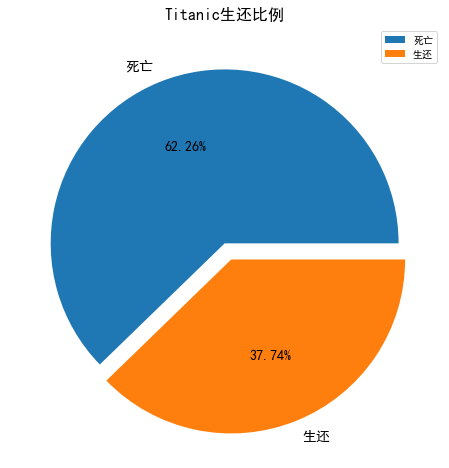

In [10]:
totalscale = titanic['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(totalscale.values , 
        labels = ['死亡','生还'], 
#         shadow=True,
        explode=[0,0.1],
        textprops={'fontsize':14,'color':'black'},
        autopct='%1.2f%%')
# 添加图标题
plt.title('Titanic生还比例',fontdict={'fontweight':500, 'size':16})

plt.legend()
plt.show()

### （2）结合性别和年龄数据，分析幸存下来的人是哪些人？

>要求：
>① 年龄数据的分布情况
>② 男性和女性存活情况
>③ 老人和小孩存活情况

**灾难面前，生死存亡之际，男士们是否让妇孺优先，展现出了高贵的骑士精神？**

![](images/titanic01.jpg)

**选取 titanic 的['Survived','Age','Sex']几列，得到一个 DataFrame ，赋值为 age_df**

In [11]:
# 筛选年龄和性别数据
age_df = titanic.loc[:, ['Survived','Age','Sex']]
age_df.head()

,Survived,Age,Sex
0,0,22.0,male
1,1,38.0,female
2,1,26.0,female
3,1,35.0,female
4,0,35.0,male


试分析年龄的**分布**情况。

试试**直方图**吧

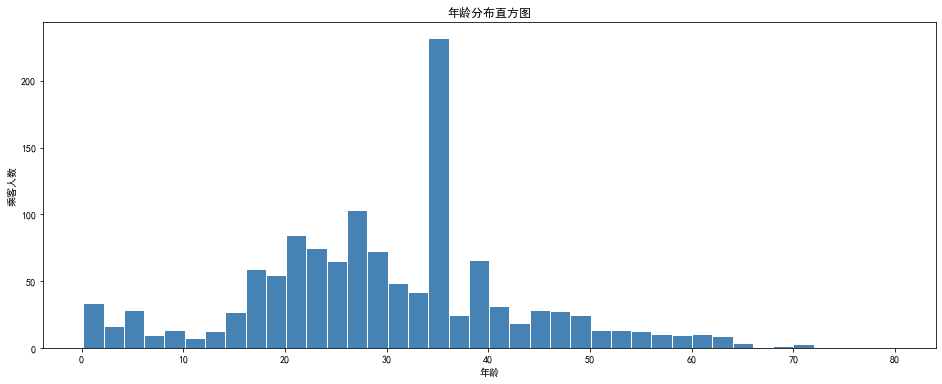

In [12]:
fig = plt.figure( figsize =(16,6) )

plt.hist( age_df['Age'],bins = 40, color = 'steelblue', edgecolor = 'w' )
plt.xlabel('年龄')
plt.ylabel('乘客人数')
plt.title('年龄分布直方图')

plt.show()

**分析男女生还比例**

提示：将 age_df 分组，分组标签为'Sex'，并求其平均值

In [13]:
age_df.groupby(['Sex']).mean()

,Survived,Age
Sex,,
female,0.82618,28.748047
male,0.12930,31.192266


以上为不同性别的生存率，可见在泰坦尼克号事故中，还是体现了 **Lady First**.

**计算不同年龄段，不同性别的生存率，并绘制柱状图和折线图（<font color='red'>此图内容根据兴趣自行学习，不要求掌握。不感兴趣？跳过即可！</font>）**

提示：
```python
# 按10岁为间隔划分成不同年龄段
s = np.arange(0,81,10)
age_df['cut'] = pd.cut(age_df['Age'],bins = s )
```
* 根据 age_df 中性别，年龄段，是否存活分组，得到DataFrame，并计数(可使用 size 或 count。size 计数时包含 NaN 值，而 count 不包含 NaN 值)。用 reset_index重设 index ,结果命名为age_cut_df

* 再根据是否存活，将 age_cut_df 数据分成两部分(age_cut_df['Survived'] == 1 即生还；age_cut_df['Survived'] == 0 即遇难)

* 根据性别和年龄段连接上一步得到的生还数据和遇难数据，添加 total 列并计算各年龄段的总人数，添加 sur_per 列计算各年龄段的存活率。

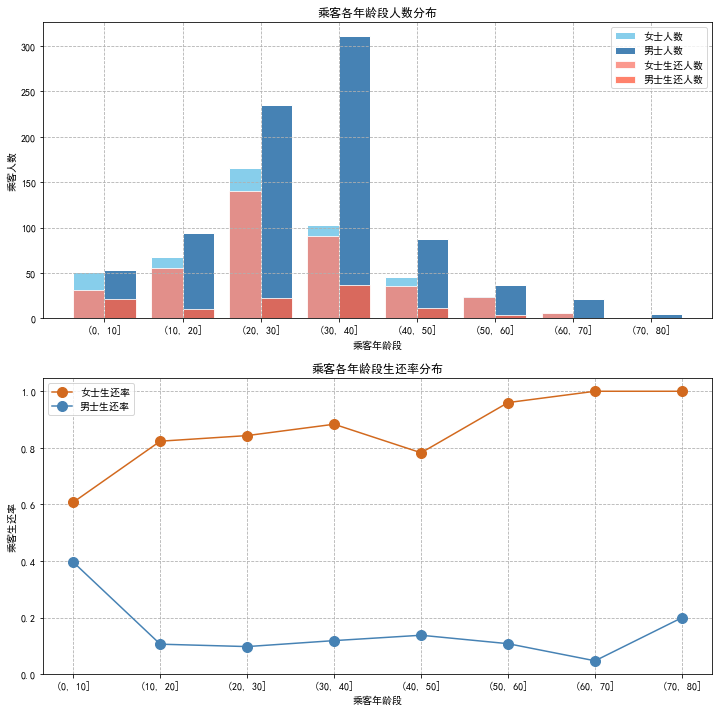

In [15]:
# 按10岁为间隔划分成不同年龄段
s = np.arange(0,81,10)
age_df['cut'] = pd.cut(age_df['Age'],bins = s )

#根据性别，年龄段，是否存活分组
age_cut_df = age_df.groupby(['Survived','Sex','cut']).size().reset_index()  # size计数时包含NaN值，而count不包含NaN值
#根据是否存活，将数据分成两部分
age_sur = age_cut_df[age_cut_df['Survived'] == 1]
age_non = age_cut_df[age_cut_df['Survived'] == 0]

#根据性别和年龄段连接数据
age_c_df = pd.merge(age_sur,age_non,on = ['Sex','cut'],how = 'outer',suffixes=('_s','_n'))
age_c_df = age_c_df.loc[:,['cut','Sex','0_s','0_n']]
#重命名字段，填充空值
age_c_df.columns = ['age_cut','sex','survived','non_survived']
age_c_df.loc[:,['survived','non_survived']] = age_c_df.loc[:,['survived','non_survived']].fillna(0)
#添加各年龄段总人数字段
age_c_df['total'] = age_c_df['survived'] + age_c_df['non_survived']
#计算各年龄段存活率字段
age_c_df['sur_per'] = age_c_df['survived'] / age_c_df['total']

# 创建子图对象
fig, axes = plt.subplots(2,1,figsize=(12, 12))

labels = age_c_df['age_cut'].unique()
x = np.arange(len(labels))
bar_width = 0.4

# 绘制各年龄段男性和女性人数柱状图
axes[0].bar(x - 0.2, age_c_df.loc[age_c_df.sex == 'female','total'],label = '女士人数',edgecolor = 'w', color = 'skyblue',  width=bar_width)
axes[0].bar(x + 0.2, age_c_df.loc[age_c_df.sex == 'male','total'],label = '男士人数',edgecolor = 'w',color = 'steelblue',  width=bar_width)
# 绘制各年龄段幸存者男性和女性人数柱状图
axes[0].bar(x - 0.2, age_c_df.loc[age_c_df.sex == 'female','survived'],label = '女士生还人数',edgecolor = 'w', color = 'salmon', alpha = 0.8, width=bar_width)
axes[0].bar(x + 0.2, age_c_df.loc[age_c_df.sex == 'male','survived'],label = '男士生还人数',edgecolor = 'w',color = 'tomato', alpha = 0.8, width=bar_width)

# 添加轴标签
axes[0].set_xlabel('乘客年龄段')
axes[0].set_ylabel('乘客人数')

# 添加标题
axes[0].set_title('乘客各年龄段人数分布')

# 添加刻度标签
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)

# 显示网格线
axes[0].grid(linestyle='--')
# 显示图例
axes[0].legend()

# 绘制各年龄段不同性别的生存率折线图
axes[1].plot(x, age_c_df.loc[age_c_df.sex == 'female','sur_per'], color='chocolate', marker='o', markersize=10, label="女士生还率")
axes[1].plot(x, age_c_df.loc[age_c_df.sex == 'male','sur_per'], color='steelblue', marker='o', markersize=10, label="男士生还率")

# 添加轴标签
axes[1].set_xlabel('乘客年龄段')
axes[1].set_ylabel('乘客生还率')

# 添加标题
axes[1].set_title('乘客各年龄段生还率分布')

# 添加刻度标签
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)

# 显示网格线
axes[1].grid(linestyle='--')
# 显示图例
axes[1].legend()

# 显示图形
plt.show()

试试绘制不同年龄下的平均生存率的**柱形图**或**折线图吧**

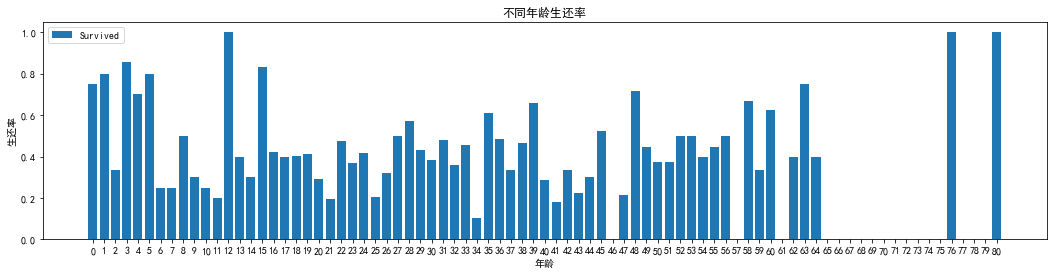

In [17]:
# 不同年龄下的平均生存率：
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
titanic['Age_int'] = titanic['Age'].astype(int)  # 或者 .apply(lambda x:int(x))
average_age = titanic.loc[:, ["Age_int", "Survived"]].groupby(['Age_int']).mean().reset_index()
# 或者这样写
# average_age = titanic.loc[:, ["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()

# 绘制柱形图
plt.bar(average_age['Age_int'], average_age['Survived'], label='Survived')

# 添加图例
plt.legend()
plt.xticks(np.arange(0,81))
plt.xlabel('年龄')
plt.ylabel('生还率')
plt.title('不同年龄生还率')

plt.show()

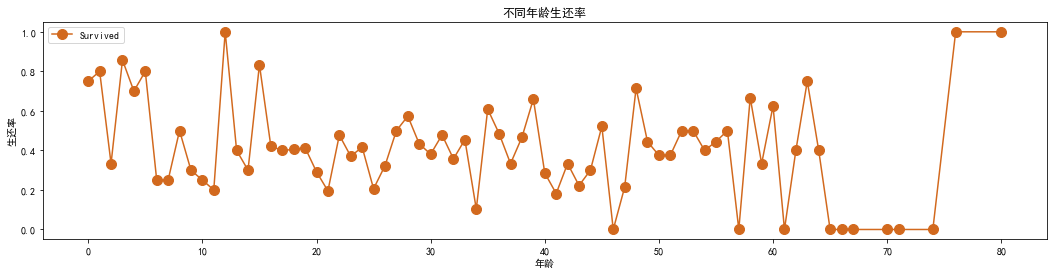

In [18]:
# 不同年龄下的平均生存率：
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
titanic['Age_int'] = titanic['Age'].astype(int)  # 或者 .apply(lambda x:int(x))
average_age = titanic.loc[:, ["Age_int", "Survived"]].groupby(['Age_int']).mean().reset_index()
# 或者这样写
# average_age = titanic.loc[:, ["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()

# 绘制折线图
plt.plot(average_age['Age_int'], average_age['Survived'],color='chocolate', marker='o', markersize=10, label='Survived')

# 添加图例
plt.legend()
plt.xticks(np.arange(0,81,10))
plt.xlabel('年龄')
plt.ylabel('生还率')
plt.title('不同年龄生还率')

plt.show()

**绘制年龄与生存率的散点图**

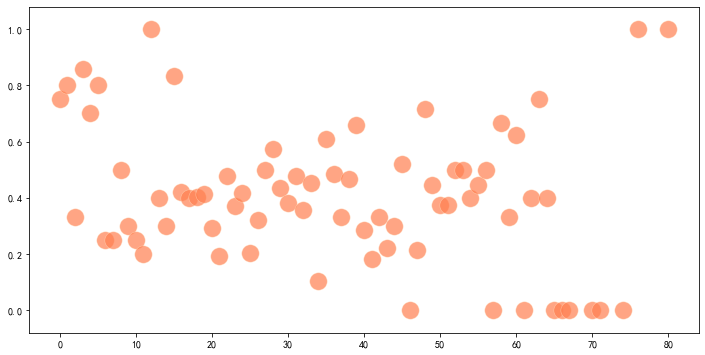

In [19]:
plt.figure(figsize=(12, 6))

plt.scatter(average_age['Age_int'],  # x轴数据
            average_age['Survived'], # y轴数据
            s = 300,      # 设置点的大小 
            c = 'coral',   # 设置点的颜色
            alpha = .7,      # 设置点的透明度
            linewidths = .5, # 设置散点边界的粗细
            edgecolors = 'peachpuff' # 设置散点边界的颜色
            )
plt.show()

根据分析可得以下结论： 

* 在这场事故中乘客存活率是37.74%，获救的乘客占总人数的小部分。 

* 女性存活率为83.62%,男性存活率为12.93%,大部分女性获救，绝大部分男性乘客都遇难了，遇难最多的男性是20~30岁的青年男性。 

* 男性乘客中除了0-10岁年龄段的存活率与女性相近以外，其他年龄段都远远低于女性，女性乘客中存活率最高的是60~70年龄段的。 

>说明当时现场救援是按照女士，老人和小孩优先的原则进行的。 

* 1等舱幸存者人数相比2,3等级要多,等级越高幸存者整体年龄越大，等级2,3中有较多10岁以下儿童幸存

### （3）结合 SibSp、Parch字段，研究亲人多少与存活的关系

>要求：
>① 有无兄弟姐妹/父母子女和存活与否的关系
>② 亲戚多少与存活与否的关系

**亲情激发之牵挂，是否更能生发出生之希望？**

> 父兮生我，母兮鞠我。抚我畜我，长我育我，顾我复我，出入腹我。欲报之德。昊天罔极! ----《诗经·小雅·蓼莪》

![](images/titanic02.jpg)

**选取 titanic 的['Survived','SibSp','Parch']几列，得到一个 DataFrame ，赋值为 sp_df**

In [20]:
#筛选SibSp、Parch数据
sp_df = titanic.loc[:, ['Survived','SibSp','Parch']]
sp_df.head()

,Survived,SibSp,Parch
0,0,1,0
1,1,1,0
2,1,0,0
3,1,1,0
4,0,0,0


**亲友的人数和存活与否的关系 SibSp & Parch**

在一个坐标系(子图)中可以混用多种图形。比如我们可以用柱形图和折线图混用来展示 Titanic 数据集中亲人数和生存率之间的关系。

【参见 ```06 Matplotlib.ipynb``` 中的```3.7 综合运用```】

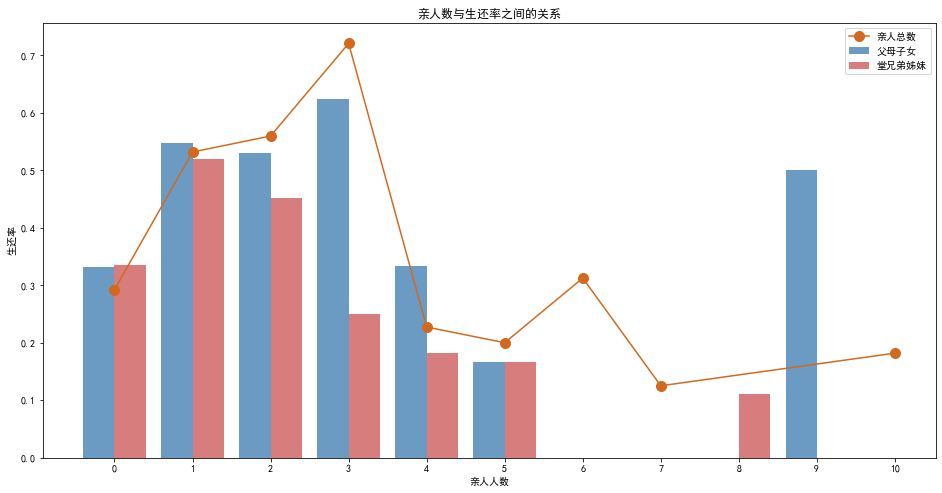

In [22]:
# 构建数据
parch = titanic[['Parch','Survived']].groupby(['Parch']).mean().reset_index()
sibsp = titanic[['SibSp','Survived']].groupby(['SibSp']).mean().reset_index()
titanic['Family_Size'] = titanic['Parch'] + titanic['SibSp']   # 亲人总数 = 父母子女数 + 堂兄弟姊妹数
family = titanic[['Family_Size','Survived']].groupby(['Family_Size']).mean().reset_index()
bar_width = 0.4

# 设置图形大小
plt.figure(figsize=(16,8))

# 绘柱形图
plt.bar(parch.Parch - 0.2, parch.Survived, label = '父母子女', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(sibsp.SibSp + 0.2, sibsp.Survived, label = '堂兄弟姊妹', color = 'indianred', alpha = 0.8, width = bar_width)
# 绘折线图
plt.plot(family.Family_Size, family.Survived, color='chocolate', marker='o', markersize=10, label="亲人总数")

# 添加轴标签
plt.xlabel('亲人人数')
plt.ylabel('生还率')

# 添加标题
plt.title('亲人数与生还率之间的关系')

# 添加刻度标签
plt.xticks(np.arange(11))
    
# 显示图例
plt.legend()

# 显示图形
plt.show()

从图表中可以看出，若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低。

根据分析可得以下结论： 

* 家庭成员在1-3人的乘客的存活率相比单生一人和家庭成员人数超过3人的乘客更高。 

* 有1-2个小孩的乘客的存活率更高。 

* 说明在救援中对有小孩的乘客会优先照顾，但是小孩太多则可能会因为公平原则无法优先考虑。

### （4）结合票的费用情况，研究票价和存活与否的关系

>要求：
>① 票价分布和存活与否的关系
>② 比较研究生还者和未生还者的票价情况

![](images/titanic03.jpg)

**选取 titanic 的['Survived','Pclass','Fare']几列，得到一个 DataFrame ，赋值为 fare_df**

In [ ]:
fare_df = titanic.loc[:, ['Survived','Pclass','Fare']]

**绘制乘客票价直方图**

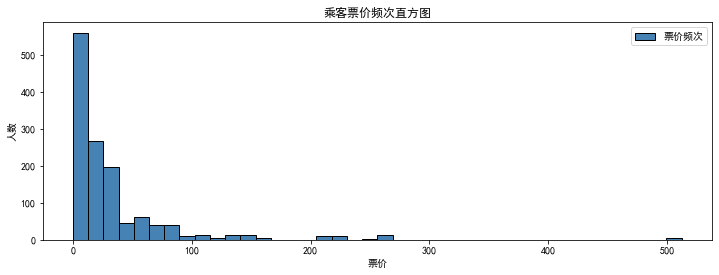

In [23]:
fare_df = titanic.loc[:, ['Survived','Pclass','Fare']]

plt.figure(figsize = (12,4))

plt.hist(fare_df.Fare, # 绘图数据
         bins = 40, # 指定直方图的条形数为20个
         color = 'steelblue', # 指定填充色
         edgecolor = 'k', # 指定直方图的边界色
         label = '票价频次' )# 为直方图呈现标签

# 设置坐标轴标签和标题
plt.title('乘客票价频次直方图')
plt.xlabel('票价')
plt.ylabel('人数')

# 显示图例
plt.legend()
# 显示图形
plt.show()

In [64]:
fare_df.groupby(['Pclass']).agg({'Survived':'sum','Fare':'mean'})

,Survived,Fare
Pclass,,
1,186,87.508992
2,117,21.179196
3,191,13.295480


根据分析可得以下结论： 

* 票价整体呈现指数下降，绝大部分乘客的票价都比较低。从等级舱票价箱型图可知，不同等级舱的票价相差很大，3等舱的大部分票价都不超过20. 

* 幸存者的平均票价高于遇难者，幸存车票价票价分布差异较大，遇难者票价分布差距较小。 

* 说明在救援中票价高的人存活率更高，在救援中按等级舱分为不同的优先等级。

### （5）称呼与存活与否的关系分析

> 能力越大,责任就越大!

> With great power comes great responsibility！

>                                    ---- 蜘蛛侠

**能力越大,责任就越大! 真的是这样吗？**

![](images/titanic04.jpg)

**观察不同称呼与生存率的关系**

选取 titanic 的['Title','Age','Survived']几列，得到一个 DataFrame ，并将其分组，分组标签为['Title']，并求其平均值,命名为 title_df

In [32]:
# 构建数据
title_df = titanic.loc[:,['Title','Age','Survived']].groupby(['Title']).mean()

**绘制不同称呼与生存率的关系的柱形图，绘制不同称呼乘客的平均年龄柱形图，最好两张图并排放置。(提示：plt.subplots( nrows=1, ncols=2))**

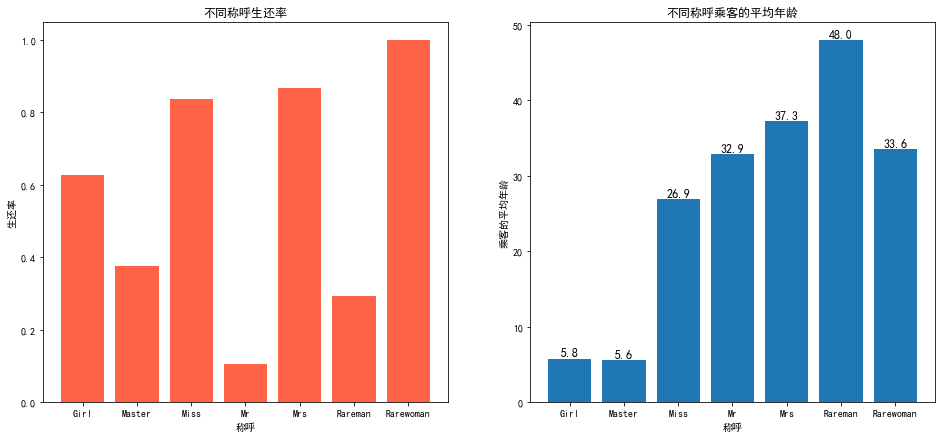

In [24]:
# 构建数据
title_df = titanic.loc[:,['Title','Age','Survived']].groupby(['Title']).mean()

# 设置图和坐标系
fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(16,7) )

# 绘制柱形图
index = np.arange(len(title_df.index))
axes[0].bar( index, title_df.Survived, color='tomato')
axes[0].set_xticks( index )
axes[0].set_xticklabels( title_df.index )
axes[0].set_xlabel('称呼')
axes[0].set_ylabel('生还率')
axes[0].set_title('不同称呼生还率')

# 绘制条形图
axes[1].bar(index,title_df.Age)
axes[1].set_xticks( index )
axes[1].set_xticklabels( title_df.index )
for x,y in zip(index, title_df.Age):
    axes[1].text(x,y,'{0:.1f}'.format(y),horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
axes[1].set_xlabel('称呼')
axes[1].set_ylabel('乘客的平均年龄')
axes[1].set_title('不同称呼乘客的平均年龄')

# plt.tight_layout()
plt.show()

“贵妇人”的生存率是100%，真是太让人惊奇了！！

## 5. 总结

> 梳理分析结果形成结论。通过提炼隐藏在数据背后的信息，总结出所研究对象的内在规律的目的，以期获得有价值的产品、服务，或深刻的洞见!

* **<font color='red'>该项目是一个经典的数据分析练手项目</font>**。这里仅选取了几个主要的因素，分析其与乘客的存活率之间的联系。尚有很多可继续分析挖掘之处，如不同等级舱不同性别各个年龄段的存活率等。

* **<font color='red'>功夫在诗外</font>**。更深入的分析需要更多的数理统计方面的知识(如统计学，线性代数等)，以及对数据的理解。如此，才能熟稔数据分析背后的原理。

* **<font color='red'>聊抛一砖以引玉，盼我燕大诸子尽心之、努力之</font>。**